In [9]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df = pd.read_csv('input/Mental Health Dataset.csv')

In [11]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [53]:
df.shape

(292364, 15)

In [41]:
print('Dieser Datensatz besitz ' + str(df.duplicated().sum()) + ' Duplikate.')
#duplicates = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))
#duplicates

Dieser Datensatz besitz 363 Duplikate.


In [42]:
categoricalVar = [col for col in df if df[col].dtype == 'object']
print('Kategorische Variablen: ' + str(categoricalVar))

numericalVar = [col for col in df if df[col].dtype != 'object']
print('Numerische Variablen: '+ str(numericalVar))

Kategorische Variablen: ['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options']
Numerische Variablen: []


In [43]:
df_prep = df

NaNs

In [44]:
df.isnull().sum()[df.isnull().sum() > 0]

self_employed    5202
dtype: int64

In [45]:
df_prep['self_employed'].fillna('unknown', inplace=True)

/var/folders/jf/k1y_jzxs5177jm_fgv__dnww0000gn/T/ipykernel_1188/341960323.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prep['self_employed'].fillna('unknown', inplace=True)


Unwichtige Spalten löschen

In [46]:
notRelevantVar =['Timestamp', 'mental_health_interview']

df_prep.drop(notRelevantVar, axis = 1, inplace = True)

Werte ändern

In [47]:
# Anzahl der Uniquen Werte ausgeben lassen
df_prep.nunique()

Gender                    2
Country                  35
Occupation                5
self_employed             3
family_history            2
treatment                 2
Days_Indoors              5
Growing_Stress            3
Changes_Habits            3
Mental_Health_History     3
Mood_Swings               3
Coping_Struggles          2
Work_Interest             3
Social_Weakness           3
care_options              3
dtype: int64

In [48]:
# Funktion: Binäre Werte in 0/1 ändern
# Input: Datensatz
# Output: Datensatz mit den neuen Werte, Mapping Dictionary 
# Funktionsweise: 
    # 1. Erstellung eines Mapping Dictionarys, 
    # 2. Die einzelnen Spalten werden durchgegangen und bei jenen wo die anzahl der einzigartigen Werte gleich zwei ist, wird der erste Werte gleich 0 gesetzt und der zweite auf 1
    # 3. Die Zuordnung der Werte wird in dem Mapping Dictionary festgehalten
def binaer_mapping_function(df):
    mapping_dict = {}
    for col in df.columns:
        if len(df[col].unique()) == 2:
            mapping_dict[col] = {df[col].unique()[0]: 0, df[col].unique()[1]: 1}
            df[col] = df[col].map(mapping_dict[col])
    return df, mapping_dict


df_prep, mapping_dict = binaer_mapping_function(df_prep)
print(mapping_dict)


{'Gender': {'Female': 0, 'Male': 1}, 'family_history': {'No': 0, 'Yes': 1}, 'treatment': {'Yes': 0, 'No': 1}, 'Coping_Struggles': {'No': 0, 'Yes': 1}}


In [13]:
list_columns_moreThanTwoUniqueValues = df.columns[df.nunique() > 2].to_list()
list_columns_moreThanTwoUniqueValues

['Country',
 'Occupation',
 'self_employed',
 'Days_Indoors',
 'Growing_Stress',
 'Changes_Habits',
 'Mental_Health_History',
 'Mood_Swings',
 'Work_Interest',
 'Social_Weakness',
 'care_options']

In [14]:
# One-hot encoding for categorical variables
for var in list_columns_moreThanTwoUniqueValues:
    dummies = pd.get_dummies(df_prep[var], prefix=var, dtype=int)
    df_prep = pd.concat([df_prep, dummies], axis=1)
    df_prep.drop(var, axis=1, inplace=True)  

In [15]:
df_ml = df_prep
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 73 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   Gender                           292364 non-null  int64
 1   family_history                   292364 non-null  int64
 2   treatment                        292364 non-null  int64
 3   Coping_Struggles                 292364 non-null  int64
 4   Country_Australia                292364 non-null  int64
 5   Country_Belgium                  292364 non-null  int64
 6   Country_Bosnia and Herzegovina   292364 non-null  int64
 7   Country_Brazil                   292364 non-null  int64
 8   Country_Canada                   292364 non-null  int64
 9   Country_Colombia                 292364 non-null  int64
 10  Country_Costa Rica               292364 non-null  int64
 11  Country_Croatia                  292364 non-null  int64
 12  Country_Czech Republic        

## Daten in Traings und Testdaten teilen

In [16]:
df_ml['treatment'].value_counts()
df_ml.shape

(292364, 73)

In [17]:
y = df_ml['treatment']
X = df_ml.loc[:,df_ml.columns != 'treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [64]:

label

'Random Forest (area = 0.76)'

In [60]:
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def results(model, modelname):
    # Predicting the test set results
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    labelname= modelname + ' (area = %0.2f)' % roc_auc


    # Plotting ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Print the scores
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'ROC AUC: {roc_auc}')


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


def plot_confusion_matrix_model(y_predicted_labels):
    cnf_matrix = confusion_matrix(y_test, y_predicted_labels)
    np.set_printoptions(precision=2)
    cnf_matrix

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    #Without Normalization
    plt.sca(axes[0])  
    plot_confusion_matrix(cnf_matrix, classes=[0, 1], title='Confusion matrix, without normalization')

    # Mit Normalisierung
    plt.sca(axes[1]) 
    plot_confusion_matrix(cnf_matrix, classes=[0, 1], normalize=True, title='Normalized confusion matrix')

    # Zeige die Figur
    plt.tight_layout()
    plt.show()



Random Forest 

Confusion matrix, without normalization
[[23201  6349]
 [ 8857 20066]]
Normalized confusion matrix
[[0.79 0.21]
 [0.31 0.69]]


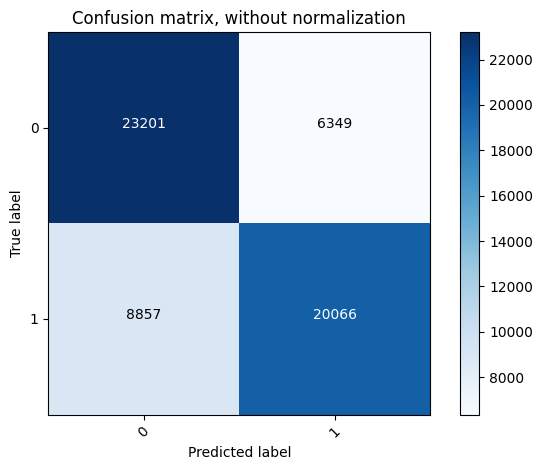

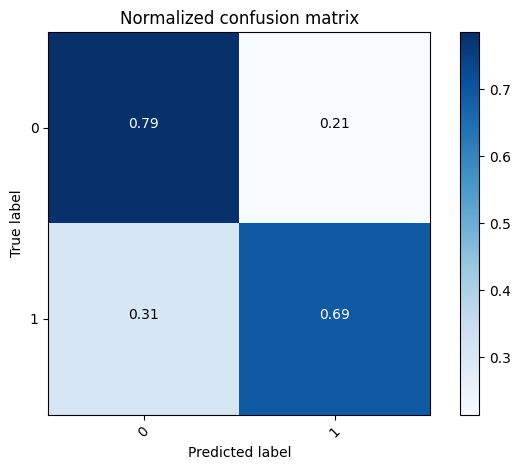

In [55]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=33)
forest.fit(X_train, y_train)
y_predicted_labels = forest.predict(X_test)

plot_confusion_matrix_model(y_predicted_labels)

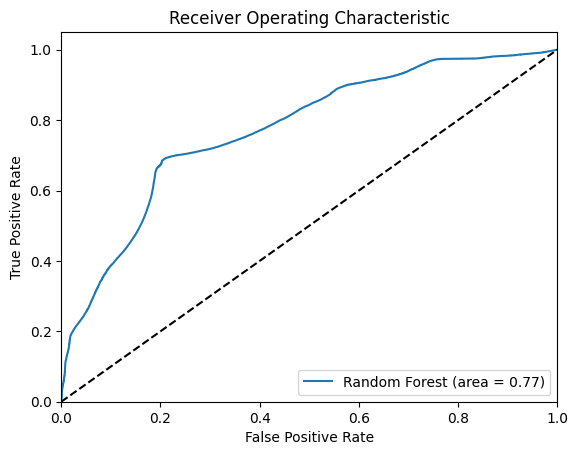

Accuracy: 0.7399483522309442
Precision: 0.75964414158622
Recall: 0.6937731217370259
F1 Score: 0.7252159456431385
ROC AUC: 0.7734205396170344


In [26]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100, 500, 1000]
max_features = ['auto', 'sqrt']
max_depth = [20, 50, 100]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 3, 5]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=33, n_jobs = -1)
rf_random.fit(X_train, y_train)

rf_random.best_params_


{'n_estimators': [100, 500, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 50, 100], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 3, 5], 'bootstrap': [True, False]}
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=  16.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=  16.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 1.9min
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_s

/Users/juliaschmid/Desktop/MALE01/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time= 4.2min
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time= 4.2min
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time= 2.0min
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time= 2.0min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time= 3.2min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time= 3.2min
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1000; total time= 4.4min
[CV] END bootstrap=False, max_dept

/Users/juliaschmid/Desktop/MALE01/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
4 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/juliaschmid/Desktop/MALE01/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/juliaschmid/Desktop/MALE01/.venv/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/juliaschmid/Desktop/MALE01/.venv/lib/python3.11/site-packages/sklearn/base.py", line 666, in _v

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

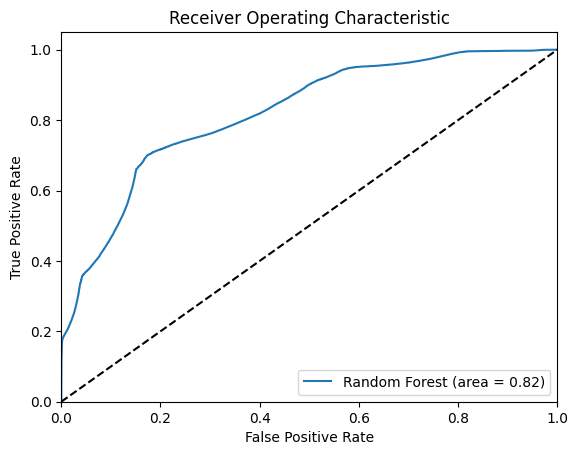

Accuracy: 0.7621295298684863
Precision: 0.7880438953265291
Recall: 0.7100923140753034
F1 Score: 0.747040101845958
ROC AUC: 0.8202225314627034


In [27]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    criterion='entropy', n_estimators=100, random_state=123, min_samples_split = 10, min_samples_leaf = 3, max_features = 'sqrt', max_depth = 20, bootstrap = True)
forest.fit(X_train, y_train)
y_predicted_labels = forest.predict(X_test)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicting the test set results
y_pred = forest.predict(X_test)
y_proba = forest.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the scores
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')


 XGboost

In [29]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric = 'auc', 
random_state=33, n_estimators=500, learning_rate=0.2)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

Confusion matrix, without normalization
[[23960  5590]
 [ 8520 20403]]
Normalized confusion matrix
[[0.81 0.19]
 [0.29 0.71]]


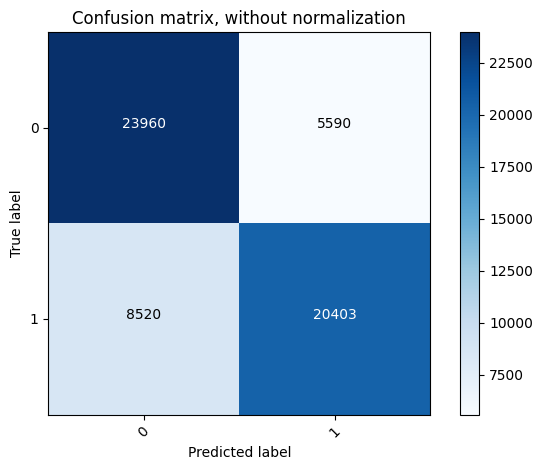

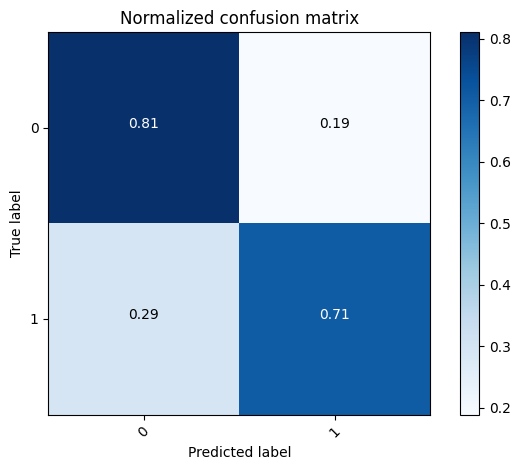

In [30]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
np.set_printoptions(precision=2)

#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix_xgb, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix_xgb, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

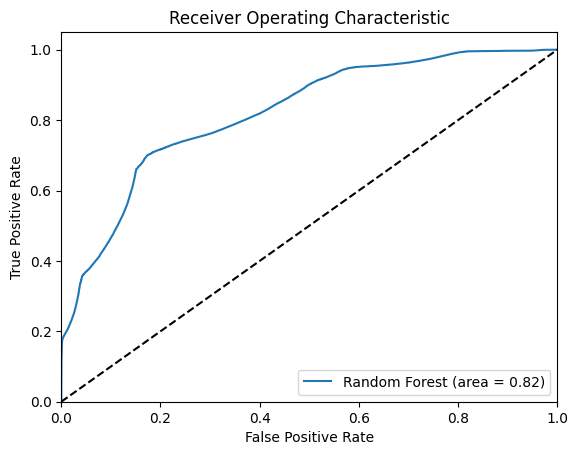

Accuracy: 0.7586920459015272
Precision: 0.784942099796099
Recall: 0.7054247484700757
F1 Score: 0.7430621312550076
ROC AUC: 0.8202225314627034


In [31]:
# Predicting the test set results

y_proba_xgb = forest.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_proba_xgb)

# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the scores
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Ensemble Methode

In [32]:
from sklearn.ensemble import VotingClassifier

# Annahme: Sie haben bereits trainierte Modelle rf und xgb

# Erstellen des Ensembles
ensemble = VotingClassifier(estimators=[
    ('random_forest', forest),
    ('xgboost', xgb_model)
], voting='soft')  # 'soft' Voting für Wahrscheinlichkeiten

# Ensemble trainieren
ensemble.fit(X_train, y_train)

# Vorhersagen machen
predictions = ensemble.predict(X_test)

# Genauigkeit berechnen
accuracy = accuracy_score(y_test, predictions)

# Präzision berechnen
precision = precision_score(y_test, predictions)

# Rückruf berechnen
recall = recall_score(y_test, predictions)

# F1-Score berechnen
f1 = f1_score(y_test, predictions)

# ROC AUC berechnen
roc_auc = roc_auc_score(y_test, predictions)

# Ergebnisse ausgeben
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

Accuracy: 0.7612060267131838
Precision: 0.7898326100433974
Recall: 0.70476783182934
F1 Score: 0.744879501562186
ROC AUC: 0.7606072661684771
